In [1]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import folium
import matplotlib.cm as cm
from rasterio.transform import from_origin
import pandas as pd
from tqdm import tqdm
import matplotlib
from rasterio.windows import Window
from rasterio.warp import reproject, Resampling, calculate_default_transform

In [2]:
def reproj(infile, match, outfile):
    """Reproject a file to match the shape and projection of existing raster. 
    
    Parameters
    ----------
    infile : (string) path to input file to reproject
    match : (string) path to raster with desired shape and projection 
    outfile : (string) path to output file tif
    """
    # open input
    with rasterio.open(infile) as src:
        src_transform = src.transform
        
        # open input to match
        with rasterio.open(match) as match:
            dst_crs = match.crs
            
            # calculate the output transform matrix
            dst_transform, dst_width, dst_height = calculate_default_transform(
                src.crs,      # input CRS
                dst_crs,    # output CRS
                src.width,   # input width
                src.height,  # input height 
                *src.bounds,  # unpacks input outer boundaries (left, bottom, right, top)
            )

        # set properties for output
        dst_kwargs = src.meta.copy()
        dst_kwargs.update({"crs": dst_crs,
                           "transform": dst_transform,
                           "width": dst_width,
                           "height": dst_height,
                           "nodata": 0})
        print("Coregistered to shape:", dst_height,dst_width,'\n Affine',dst_transform)
        # open output
        with rasterio.open(outfile, "w", **dst_kwargs) as dst:
            # iterate through bands and write using reproject function
            for i in range(1, src.count + 1):
                reproject(
                    source=rasterio.band(src, i),
                    destination=rasterio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=dst_transform,
                    dst_crs=dst_crs,
                    resampling=Resampling.nearest)


In [3]:
def reproj_match(infile, match, outfile):
    """Reproject a file to match the shape and projection of existing raster. 
    
    Parameters
    ----------
    infile : (string) path to input file to reproject
    match : (string) path to raster with desired shape and projection 
    outfile : (string) path to output file tif
    """
    # open input
    with rasterio.open(infile) as src:
        src_transform = src.transform
        
        # open input to match
        with rasterio.open(match) as match:
            dst_crs = match.crs
            
            # calculate the output transform matrix
            dst_transform, dst_width, dst_height = calculate_default_transform(
                src.crs,      # input CRS
                dst_crs,    # output CRS
                match.width,   # input width
                match.height,  # input height 
                *match.bounds,  # unpacks input outer boundaries (left, bottom, right, top)
            )
       
        # set properties for output
        dst_kwargs = src.meta.copy()
        dst_kwargs.update({"crs": dst_crs,
                           "transform": dst_transform,
                           "width": dst_width,
                           "height": dst_height,
                           "nodata": 0})
        print("Coregistered to shape:", dst_height,dst_width,'\n Affine',dst_transform)
        # open output
        with rasterio.open(outfile, "w", **dst_kwargs) as dst:
            # iterate through bands and write using reproject function
            for i in range(1, src.count + 1):
                reproject(
                    source=rasterio.band(src, i),
                    destination=rasterio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=dst_transform,
                    dst_crs=dst_crs,
                    resampling=Resampling.nearest)     

In [7]:
paths = [
    'raster_clean_LH/temp1_LH_clean.tif',
    'raster_clean_LH/temp2_LH_clean.tif',
    'raster_clean_LH/temp3_LH_clean.tif',
    'raster_clean_LH/temp4_LH_clean.tif',
    'raster_clean_LH/temp5_LH_clean.tif',
    'raster_clean_LH/temp6_LH_clean.tif',
    'raster_clean_LH/temp7_LH_clean.tif',
    'raster_clean_LH/temp8_LH_clean.tif',
    'raster_clean_LH/PPI_LH_clean.tif',
    'raster_clean_LH/FAPAR_LH_clean.tif'
]

In [6]:
file_names = [
    'temp1_LH_align.tif',
    'temp2_LH_align.tif',
    'temp3_LH_align.tif',
    'temp4_LH_align.tif',
    'temp5_LH_align.tif',
    'temp6_LH_align.tif',
    'temp7_LH_align.tif',
    'temp8_LH_align.tif',
    'PPI_LH_align.tif',
    'FAPAR_LH_align.tif'
]

In [10]:
for i in range(9) :
    precip =paths[9]
    LS =paths[i]
    output_name = file_names[i]
    
    # co-register LS to match precip raster
    reproj(infile = LS, 
                 match= precip,
                 outfile = 'inter_LH.tif')
    reproj_match(infile = 'inter_LH.tif', 
                 match= precip,
                 outfile = output_name)

Coregistered to shape: 1176 1084 
 Affine | 30.00, 0.00, 715223.38|
| 0.00,-30.00, 5508209.19|
| 0.00, 0.00, 1.00|
Coregistered to shape: 2500 3500 
 Affine | 10.00, 0.00, 714960.00|
| 0.00,-10.00, 5500020.00|
| 0.00, 0.00, 1.00|
Coregistered to shape: 1176 1084 
 Affine | 30.00, 0.00, 716419.55|
| 0.00,-30.00, 5508304.96|
| 0.00, 0.00, 1.00|
Coregistered to shape: 2500 3500 
 Affine | 10.00, 0.00, 714960.00|
| 0.00,-10.00, 5500020.00|
| 0.00, 0.00, 1.00|
Coregistered to shape: 1176 1084 
 Affine | 30.00, 0.00, 715223.38|
| 0.00,-30.00, 5508209.19|
| 0.00, 0.00, 1.00|
Coregistered to shape: 2500 3500 
 Affine | 10.00, 0.00, 714960.00|
| 0.00,-10.00, 5500020.00|
| 0.00, 0.00, 1.00|
Coregistered to shape: 1176 1084 
 Affine | 30.00, 0.00, 714625.31|
| 0.00,-30.00, 5508161.30|
| 0.00, 0.00, 1.00|
Coregistered to shape: 2500 3500 
 Affine | 10.00, 0.00, 714960.00|
| 0.00,-10.00, 5500020.00|
| 0.00, 0.00, 1.00|
Coregistered to shape: 1176 1084 
 Affine | 30.00, 0.00, 714625.31|
| 0.00,-30.0

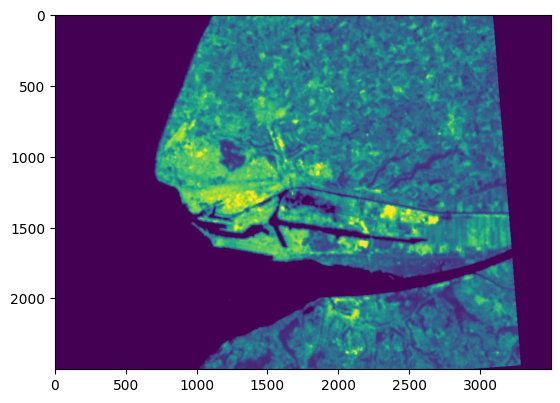

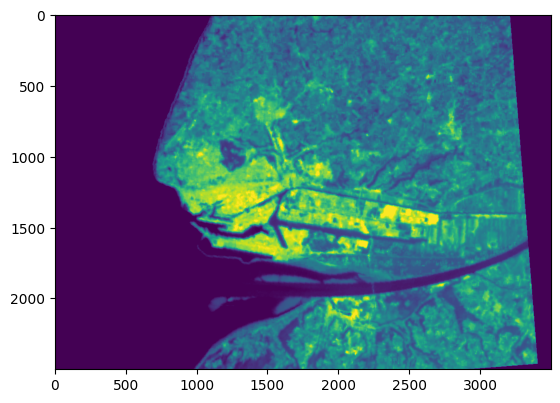

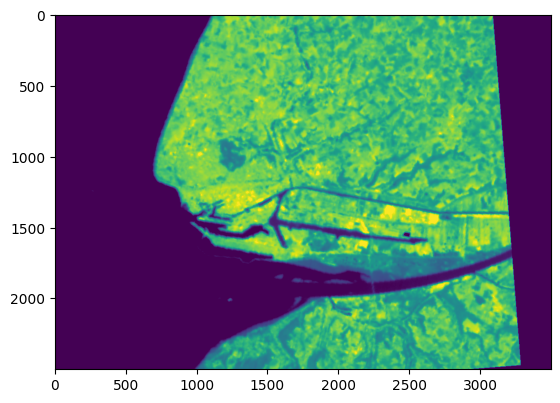

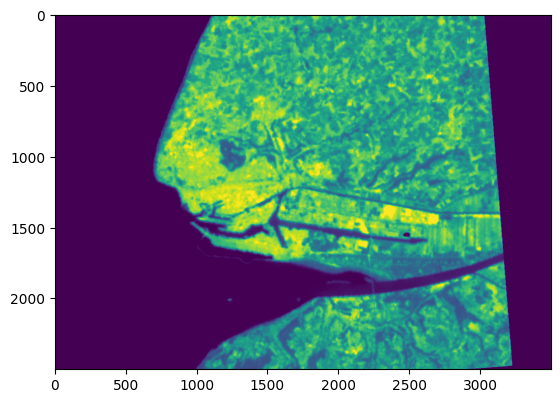

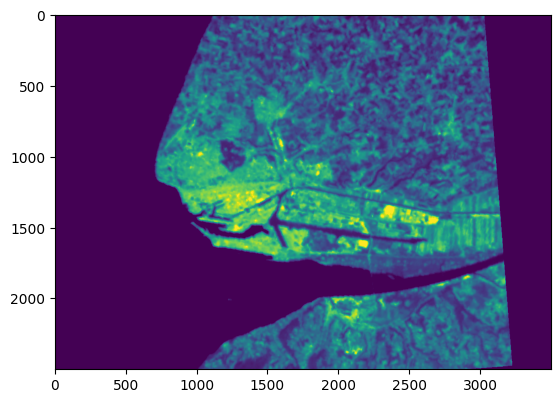

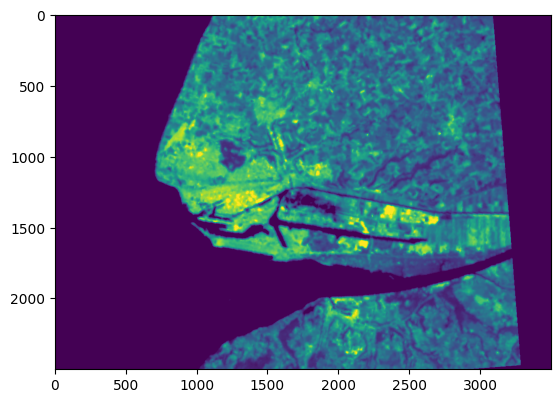

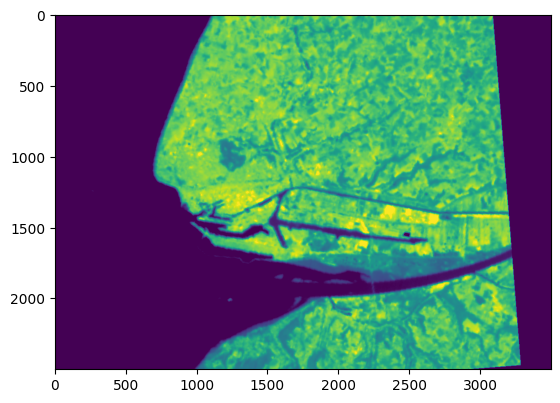

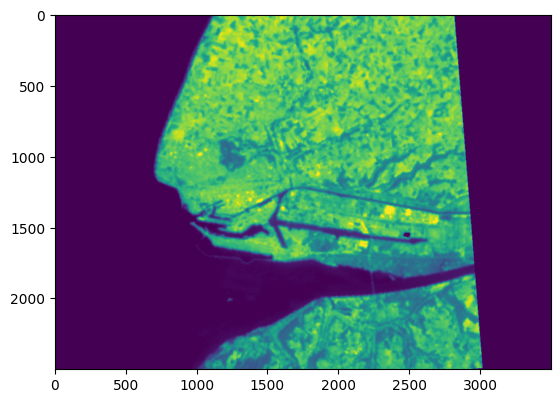

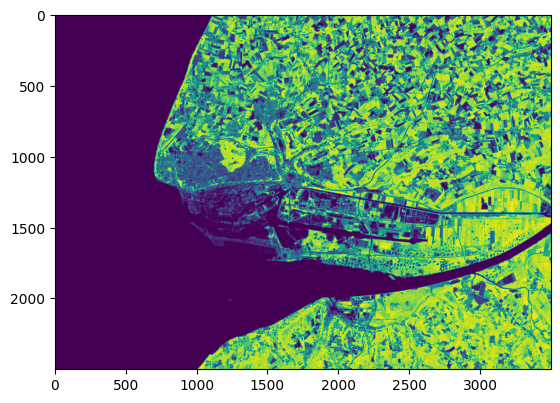

In [19]:
for i in range(9) :
    with rasterio.open(file_names[i]) as data :
        band1 = data.read(1)
        show(band1)

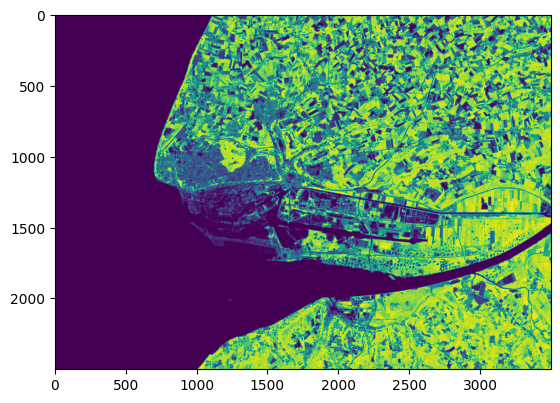

In [17]:
with rasterio.open(file_names[8]) as data :
        band1 = data.read(1)
        show(band1)